In [1]:
pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=6ca328c731ce3ea80c028a819ad7354d9e1440cbf94066b03212d830bc121cbc
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [2]:
pip install newspaper3k

     |████████████████████████████████| 211 kB 5.2 MB/s 
     |████████████████████████████████| 81 kB 8.0 MB/s 
     |████████████████████████████████| 87 kB 6.7 MB/s 
     |████████████████████████████████| 7.4 MB 22.7 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=edd2bb730fbbf74fc8f4c6ad47217ae5b216c6f97b8ffcb470ded78eb06d6095
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=c0757f6b69a5f2f27ccc05dfc091929a9e306d64428ec0774b37bdb3f2c52135
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=7fbc39701ea65a5e13fa019c47c53ec9e781cbd86df35fa492aefa0ad300af89
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a597957432

In [3]:
pip install mplsoccer

     |████████████████████████████████| 58 kB 2.9 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.6-py3-none-any.whl size=62946 sha256=bf2a242b132d16b13e02d234f10d82068d499b3fd908f1b0c04e660f8864fe4f
  Stored in directory: /root/.cache/pip/wheels/ff/fc/ed/09e6cb7c61780f5462f1dfd1df7d1fabef0123ced961ac0738
Successfully built mplsoccer


In [4]:
import nltk
import random
import string
import spacy
import re, string, unicodedata
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import wikipedia as wk
from collections import defaultdict
from newspaper import Article
import warnings
warnings.filterwarnings("ignore")
nltk.download('punkt') 
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [5]:
import torch
import torch.nn as nn
import numpy as np
import random
import json
import pandas as pd

from torch.utils.data import Dataset, DataLoader

Data from website

In [6]:
import re
import requests
from bs4 import BeautifulSoup as bs
url="https://www.britannica.com/sports/football-soccer"
html_text=requests.get(url).text
soup=bs(html_text,'html.parser')
anchors=soup.find_all('a',href=re.compile(r'^/sports/football-soccer'))
a=[]
for i in anchors:
    a.append(i.get('href'))

In [7]:
data=""
for i in a:
    url="https://www.britannica.com"
    url+=i
    article= Article('https://www.britannica.com/sports/football-soccer/Football-around-the-world')
    article.download()
    article.parse()
    article.nlp()
    corpus=article.text
    data+=corpus
#print(data)

In [8]:
raw=data.lower()

In [9]:
raw

'england and scotland had the first leagues, but clubs sprang up in most european nations in the 1890s and 1900s, enabling these nations to found their own leagues. many scottish professional players migrated south to join english clubs, introducing english players and audiences to more-advanced ball-playing skills and to the benefits of teamwork and passing. up to world war ii, the british continued to influence football’s development through regular club tours overseas and the continental coaching careers of former players. itinerant scots were particularly prominent in central europe. the interwar danubian school of football emerged from the coaching legacies and expertise of john madden in prague and jimmy hogan in austria.\n\nbefore world war ii, italian, austrian, swiss, and hungarian teams emerged as particularly strong challengers to the british. during the 1930s, italian clubs and the italian national team recruited high-calibre players from south america (mainly argentina and

In [ ]:
# pip install statsbombpy

In [ ]:

# from statsbombpy import sb
# sb.competitions()
# mtch=sb.matches(competition_id='11',season_id='90')

In [ ]:
# mtch

In [ ]:
# sb.events(match_id='3773369').columns

DATA pre processing

In [10]:
st_tokens = nltk.sent_tokenize(raw)
sent_tokens=[]

In [11]:
for i in st_tokens:
    if len(i)>10 and i!="take this quiz to find out how many fun facts you know about the history and evolution of sports, some of them familiar and others definitely not.":
        sent_tokens.append(i)

In [12]:
def Normalize(text):
    remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
    #word tokenization
    word_token = nltk.word_tokenize(text.lower().translate(remove_punct_dict))
    
    #remove ascii
    new_words = []
    for word in word_token:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    
    #Remove tags
    rmv = []
    for w in new_words:
        text=re.sub("&lt;/?.*?&gt;","&lt;&gt;",w)
        rmv.append(text)
        
    #pos tagging and lemmatization
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    lmtzr = WordNetLemmatizer()
    lemma_list = []
    rmv = [i for i in rmv if i]
    for token, tag in nltk.pos_tag(rmv):
        lemma = lmtzr.lemmatize(token, tag_map[tag[0]])
        lemma_list.append(lemma)
        # lemma_list=list(set(lemma_list))
    return lemma_list

Model

In [13]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.l2 = nn.Linear(hidden_size, hidden_size) 
        self.l3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        # no activation and no softmax at the end
        return out


In [14]:
def bag_of_words(tokenized_sentence, words):
    # stem each word
    # initialize bag with 0 for each word
    bag = np.zeros(len(words), dtype=np.float32)
    for idx, w in enumerate(words):
        if w in tokenized_sentence: 
            bag[idx] = 1

    return bag

In [15]:
with open('intents.json', 'r') as f:
    intents = json.load(f)

all_words = Normalize(raw)
wordss=[]
#all_words= []
tags = []
xy = []
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    tag = intent['tag']
    # add to tag list
    tags.append(tag)
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = Normalize(pattern)
        # add to our words list
        wordss.extend(w)
        # add to xy pair
        xy.append((w, tag))

# stem and lower each word
wordss = sorted(set(wordss))
tags = sorted(set(tags))

print(len(xy), "patterns")
print(len(tags), "tags:", tags)
print(len(wordss), "unique stemmed words:",wordss)



27 patterns
7 tags: ['club', 'funny', 'goodbye', 'greeting', 'number', 'player', 'thanks']
48 unique stemmed words: ['a', 'accord', 'anyone', 'be', 'best', 'bye', 'club', 'day', 'do', 'favorite', 'funny', 'good', 'goodbye', 'gracias', 'hello', 'helpful', 'hey', 'hi', 'hola', 'how', 'in', 'joke', 'know', 'later', 'laugh', 'lot', 'make', 'many', 'me', 'player', 'see', 'ship', 'size', 'something', 'support', 'team', 'tell', 'thank', 'thanks', 'thats', 'the', 'there', 'to', 'which', 'who', 'whom', 'you', 'your']


Training

In [16]:
# create training data
X_train = []
y_train = []
for (pattern_sentence, tag) in xy:
    # X: bag of words for each pattern_sentence
    bag = bag_of_words(pattern_sentence, wordss)
    X_train.append(bag)
    # y: PyTorch CrossEntropyLoss needs only class labels, not one-hot
    label = tags.index(tag)
    y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
# Hyper-parameters 
num_epochs = 1000
batch_size = 8
learning_rate = 0.001
input_size = len(X_train[0])
hidden_size = 15
output_size = len(tags)
print(input_size, output_size)

class ChatDataset(Dataset):

    def __init__(self):
        self.n_samples = len(X_train)
        self.x_data = X_train
        self.y_data = y_train

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples

dataset = ChatDataset()
train_loader = DataLoader(dataset=dataset,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = NeuralNet(input_size, hidden_size, output_size).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    for (words, labels) in train_loader:
        words = words.to(device)
        labels = labels.to(dtype=torch.long).to(device)
        
        # Forward pass
        outputs = model(words)
        # if y would be one-hot, we must apply
        # labels = torch.max(labels, 1)[1]
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch+1) % 100 == 0:
        print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


print(f'final loss: {loss.item():.4f}')


48 7
Epoch [100/1000], Loss: 0.2726
Epoch [200/1000], Loss: 0.0319
Epoch [300/1000], Loss: 0.0228
Epoch [400/1000], Loss: 0.0024
Epoch [500/1000], Loss: 0.0043
Epoch [600/1000], Loss: 0.0022
Epoch [700/1000], Loss: 0.0007
Epoch [800/1000], Loss: 0.0003
Epoch [900/1000], Loss: 0.0003
Epoch [1000/1000], Loss: 0.0002
final loss: 0.0002


In [19]:
model

NeuralNet(
  (l1): Linear(in_features=48, out_features=15, bias=True)
  (l2): Linear(in_features=15, out_features=15, bias=True)
  (l3): Linear(in_features=15, out_features=7, bias=True)
  (relu): ReLU()
)

Generating Responses

In [25]:
def generateResponse(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=Normalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    #vals = cosine_similarity(tfidf[-1], tfidf)
    vals = linear_kernel(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0) or "tell me about" in user_response:
        print("Checking Wikipedia")
        if user_response:
            NER = spacy.load("en_core_web_sm")
            text1= NER(user_response)
            ent=[]
            for wrd in text1.ents:
                ent.append(wrd.text)
            robo_response=[]
            for i in range(len(ent)):
                robo_response.append(wikipedia_data(ent[i]))
            return robo_response
    else:
        # print('imhere',idx)
        robo_response = robo_response+sent_tokens[idx]
        return robo_response
#wikipedia search
def wikipedia_data(input):
    reg_ex = re.search('tell me about (.*)', input)
    try:
        if reg_ex:
            topic = reg_ex.group(1)
            wiki = wk.summary(topic, sentences = 3)
            return wiki
    except Exception as e:
            return "I don't understand.."

analytics function

In [21]:
def displaytics(xh,yh,xa,ya):
    from mplsoccer.pitch import Pitch
    pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
    fig, ax = pitch.draw()
    nodes=pitch.scatter(120-(120*(xh)),80-(80*(yh)),s=20,ax=ax)
    nodes=pitch.scatter(120*(xa),80*(ya),s=20,ax=ax,color='red')


In [22]:
def match_analytics(id):
    base_url = 'https://understat.com/match/'
    url = base_url+id
    res = requests.get(url)
    soup = bs(res.content, 'lxml')
    scripts = soup.find_all('script')
    strings = scripts[1].string
    ind_start = strings.index("('")+2 
    ind_end = strings.index("')") 
    json_data = strings[ind_start:ind_end] 
    json_data = json_data.encode('utf8').decode('unicode_escape')

    #convert string to json format
    data = json.loads(json_data)

    xh = []
    yh = []
    xa=[]
    ya=[]
    xG = []
    result = []
    team = []
    data_away = data['a']
    data_home = data['h']

    for index in range(len(data_home)):
        for key in data_home[index]:
            if key == 'X':
                xh.append(data_home[index][key])
            if key == 'Y':
                yh.append(data_home[index][key])
            if key == 'h_team':
                team.append(data_home[index][key])
            if key == 'xG':
                xG.append(data_home[index][key])
            if key == 'result':
                result.append(data_home[index][key])

    for index in range(len(data_away)):
        for key in data_away[index]:
            if key == 'X':
                xa.append(data_away[index][key])
            if key == 'Y':
                ya.append(data_away[index][key])
            if key == 'a_team':
                team.append(data_away[index][key])
            if key == 'xG':
                xG.append(data_away[index][key])
            if key == 'result':
                result.append(data_away[index][key])
            
    # col_names = ['x','y','xG','result','team']
    # df = pd.DataFrame([xh,yh,xG,result,team],index=col_names)
    # df = df.T
    xh=pd.to_numeric(xh)
    yh=pd.to_numeric(yh)
    xa=pd.to_numeric(xa)
    ya=pd.to_numeric(ya)
    displaytics(xh,yh,xa,ya)

Main

My name is FooBot and I'm a chatbot.
FooBot:Choose chat, analytics or history.
You: chat
OK, what do you want to talk about
You: hoal
FooBot: I do not understand...
You: hola
FooBot: Hey :-)
You: team size
FooBot: 11
You: which is the favorite player
FooBot: Lionel Messi
You: favorite club
FooBot: I support FC Barcelona
You: make me laugh
FooBot: What’s the difference between The Invisible Man and Italy? You’ve got more chance of seeing The Invisible Man at the World Cup Finals!
You: Bye
FooBot:Choose chat, analytics or history.
You: histry
FooBot:Choose chat, analytics or history.
You: history
OK, what do you want to ask about
You: who is the gentle giant
FooBot:for example, the welshman john charles, known as “the gentle giant,” remains a hero for supporters of the juventus club of turin, italy, while the later success of real madrid was built largely on the play of argentinian alfredo di stefano and the hungarian puskás.
You: football after world war ii
FooBot:but only after world w

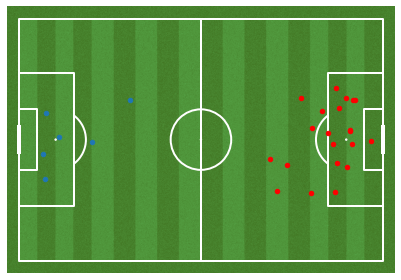

In [28]:
bot_name = "FooBot"
print("My name is FooBot and I'm a chatbot.")
while True:
    print('FooBot:Choose chat, analytics or history.')
    # sentence = "do you use credit cards?"
    sentence = input("You: ")
    if sentence.lower() == "bye":
        break
    query=sentence
    
    if sentence.lower()=="chat":
        print('OK, what do you want to talk about')
        while True:
            sentence = input("You: ")
            if sentence.lower() == "bye":
                break
            sentence = Normalize(sentence)
            #print(sentence)
            X = bag_of_words(sentence, wordss)
            #print(X)
            X = X.reshape(1, X.shape[0])
            X = torch.from_numpy(X).to(device)
            
            output = model(X)
            _, predicted = torch.max(output, dim=1)

            tag = tags[predicted.item()]

            probs = torch.softmax(output, dim=1)
            prob = probs[0][predicted.item()]
            if prob.item() > 0.6:
                for intent in intents['intents']:
                    if tag == intent["tag"]:
                        print(f"{bot_name}: {random.choice(intent['responses'])}")
            else:
                print(f"{bot_name}: I do not understand...")
    
    elif sentence.lower()=="history":
        print('OK, what do you want to ask about')
        while True:
            sentence = input("You: ")
            if sentence.lower() == "bye":
                break
            print(f"{bot_name}:{generateResponse(sentence)}")
            sent_tokens.remove(sentence)
        #print(generateResponse(query))

    elif sentence.lower()=="analytics":
        
        while True:
            sentence = input("You: ")
            if sentence.lower() == "bye":
                break
            match_analytics(sentence)
        
